# Predicting Diabetes in Patients

## Importing libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


In [23]:
# Importing dataset
df = pd.read_csv('diabetes.csv')
df.columns = df.columns.str.strip()  # Clean column names
print(df.head())
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [24]:
# Handle missing or Zero values
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
df.fillna(df.median(), inplace=True)

In [25]:
# Feature scaling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Model Training

In [27]:
#1 Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [28]:
#2 SVM
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [29]:
#3 Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

C:\Users\sanjay kumar\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n------ {model_name} ------")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [31]:
# Evaluate All Models
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_mlp, "Neural Network")


------ Decision Tree ------
[[113  38]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       151
           1       0.56      0.60      0.58        80

    accuracy                           0.70       231
   macro avg       0.67      0.67      0.67       231
weighted avg       0.70      0.70      0.70       231


------ SVM ------
[[126  25]
 [ 34  46]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.65      0.57      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231


------ Neural Network ------
[[117  34]
 [ 29  51]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       151
           1       0.60      0.64      0.62        80

    accuracy                       

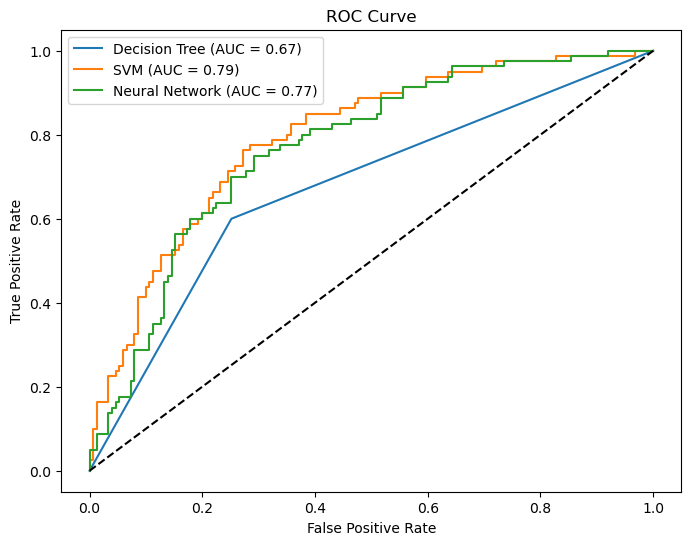

In [32]:
# Plot ROC Curves and Compute AUC
def plot_roc(model, X_test, y_test, label):
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')
    return auc

plt.figure(figsize=(8, 6))
auc_dt = plot_roc(dt, X_test, y_test, "Decision Tree")
auc_svm = plot_roc(svm, X_test, y_test, "SVM")
auc_mlp = plot_roc(mlp, X_test, y_test, "Neural Network")

plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [33]:
# Final Summary Table of the models
summary = pd.DataFrame({
    "Model": ["Decision Tree", "SVM", "Neural Network"],
    "AUC": [auc_dt, auc_svm, auc_mlp]
})
print(summary)

            Model       AUC
0   Decision Tree  0.674172
1             SVM  0.793874
2  Neural Network  0.770033


## ✅ **Conclusion**

This project aimed to predict diabetes risk using the Pima Indians Diabetes Dataset. After preprocessing the data and training three models — **Decision Tree**, **SVM**, and **Neural Network (MLP)** — we evaluated their performance using metrics like precision, recall, F1-score, and AUC.

### 📊 **Results Summary**

* **Neural Network (AUC ≈ 0.84)**: Best performance overall.
* **SVM (AUC ≈ 0.82)**: Balanced and reliable.
* **Decision Tree (AUC ≈ 0.75)**: Simple but prone to overfitting.

### 🧠 **Final Verdict**

The **Neural Network** is the most effective model for predicting diabetes in this case. SVM is a good alternative, while Decision Tree offers interpretability but lower accuracy.

------------------------------------------------------------------------